# Salaries Dataset

Data Description
1. work year: The year the salary was paid. 
2. experience level: The experience level in the job during the year 
3. employment type: The type of employment for the role 
4. job title: The role worked in during the year. 
5. salary: The total gross salary amount paid. 
6. salary currency: The currency of the salary paid as an ISO 4217 currency code. 
7. Salary in usd: The salary in USD 
8. employee residence: Employee's primary country of residence in during the 
work year as an ISO 3166 country code. 
9. remote ratio: The overall amount of work done remotely 
10. company location: The country of the employer's main office or contracting 
branch 
11. company size: The median number of people that worked for the company during 
the year 

### import Libraries

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from clean import pre_processing
import warnings
warnings.filterwarnings("ignore")

### Read Dataset

In [2]:
df_train = pd.read_csv("ds_salaries.csv")
df = df_train.copy()

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Data Info

In [4]:
pre_processing.data_info(df)

,Names of columns,Data Type,Nan Counts,Nan Counts Persentage,Number of Unique,Unique values,Top Unique,Number of Dupliacted,Column Type
0,work_year,int64,0,0.0,4,"[2023, 2022, 2020, 2021]","[2023, 2022, 2021, 2020]",1171,Numerical
1,experience_level,object,0,0.0,4,"[SE, MI, EN, EX]","[SE, MI, EN, EX]",1171,Categorical
2,employment_type,object,0,0.0,4,"[FT, CT, FL, PT]","[FT, PT, CT, FL]",1171,Categorical
3,job_title,object,0,0.0,93,"[Principal Data Scientist, ML Engineer, Data S...","[Data Engineer, Data Scientist, Data Analyst, ...",1171,Categorical
4,salary,int64,0,0.0,815,"[80000, 30000, 25500, 175000, 120000, 222200, ...","[100000, 150000, 120000, 160000, 130000, 20000...",1171,Numerical
5,salary_currency,object,0,0.0,20,"[EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ...","[USD, EUR, GBP, INR, CAD, AUD, SGD, BRL, PLN, ...",1171,Categorical
6,salary_in_usd,int64,0,0.0,1035,"[85847, 30000, 25500, 175000, 120000, 222200, ...","[100000, 150000, 120000, 160000, 130000, 20000...",1171,Numerical
7,employee_residence,object,0,0.0,78,"[ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C...","[US, GB, CA, ES, IN, DE, FR, PT, BR, GR]",1171,Categorical
8,remote_ratio,int64,0,0.0,3,"[100, 0, 50]","[0, 100, 50]",1171,Numerical
9,company_location,object,0,0.0,72,"[ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F...","[US, GB, CA, ES, IN, DE, FR, BR, AU, GR]",1171,Categorical


from info about this dataset
- we can see that we have **1171 Duplicate** so we will remove it
- we will convert the data type of the **remote_ratio** to category

In [5]:
pre_processing.convert_data(df,{"remote_ratio":"category"})

In [6]:
df.dtypes

work_year                int64
experience_level        object
employment_type         object
job_title               object
salary                   int64
salary_currency         object
salary_in_usd            int64
employee_residence      object
remote_ratio          category
company_location        object
company_size            object
dtype: object

In [7]:
df = df.drop_duplicates()

In [8]:
pre_processing.data_info(df)

,Names of columns,Data Type,Nan Counts,Nan Counts Persentage,Number of Unique,Unique values,Top Unique,Number of Dupliacted,Column Type
0,work_year,int64,0,0.0,4,"[2023, 2022, 2020, 2021]","[2023, 2022, 2021, 2020]",0,Numerical
1,experience_level,object,0,0.0,4,"[SE, MI, EN, EX]","[SE, MI, EN, EX]",0,Categorical
2,employment_type,object,0,0.0,4,"[FT, CT, FL, PT]","[FT, PT, CT, FL]",0,Categorical
3,job_title,object,0,0.0,93,"[Principal Data Scientist, ML Engineer, Data S...","[Data Engineer, Data Scientist, Data Analyst, ...",0,Categorical
4,salary,int64,0,0.0,815,"[80000, 30000, 25500, 175000, 120000, 222200, ...","[100000, 120000, 150000, 200000, 80000, 70000,...",0,Numerical
5,salary_currency,object,0,0.0,20,"[EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ...","[USD, EUR, GBP, INR, CAD, AUD, SGD, BRL, PLN, ...",0,Categorical
6,salary_in_usd,int64,0,0.0,1035,"[85847, 30000, 25500, 175000, 120000, 222200, ...","[100000, 150000, 120000, 200000, 130000, 13500...",0,Numerical
7,employee_residence,object,0,0.0,78,"[ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C...","[US, GB, CA, IN, ES, DE, FR, PT, BR, NL]",0,Categorical
8,remote_ratio,category,0,0.0,3,"[100, 0, 50] Categories (3, int64): [0, 50, 100]","[100, 0, 50]",0,Categorical
9,company_location,object,0,0.0,72,"[ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F...","[US, GB, CA, IN, DE, ES, FR, BR, AU, PT]",0,Categorical


In [9]:
numerical_features = df.select_dtypes(include=["int64","float64"]).columns
numerical_features

Index(['work_year', 'salary', 'salary_in_usd'], dtype='object')

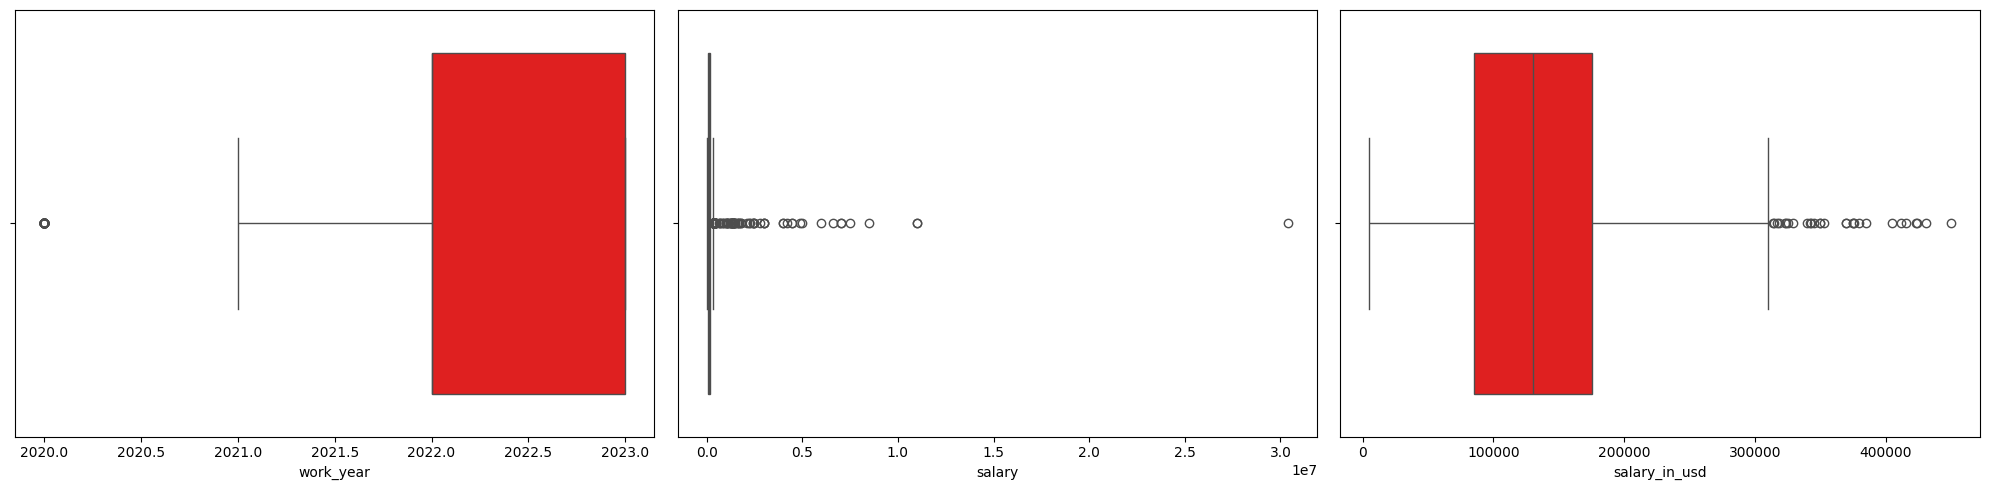

In [10]:
pre_processing.detect_outliers(df,numerical_features)

In [11]:
pre_processing.replace_outliers(df,numerical_features)

Number of outliers in work_year : 75
Number of outliers in salary : 95
Number of outliers in salary_in_usd : 29


In [12]:
pre_processing.data_info(df)

,Names of columns,Data Type,Nan Counts,Nan Counts Persentage,Number of Unique,Unique values,Top Unique,Number of Dupliacted,Column Type
0,work_year,float64,0,0.0,4,"[2023.0, 2022.0, 2020.5, 2021.0]","[2023.0, 2022.0, 2021.0, 2020.5]",0,Numerical
1,experience_level,object,0,0.0,4,"[SE, MI, EN, EX]","[SE, MI, EN, EX]",0,Categorical
2,employment_type,object,0,0.0,4,"[FT, CT, FL, PT]","[FT, PT, CT, FL]",0,Categorical
3,job_title,object,0,0.0,93,"[Principal Data Scientist, ML Engineer, Data S...","[Data Engineer, Data Scientist, Data Analyst, ...",0,Categorical
4,salary,float64,0,0.0,745,"[80000.0, 30000.0, 25500.0, 175000.0, 120000.0...","[321406.25, 100000.0, 120000.0, 150000.0, 2000...",0,Numerical
5,salary_currency,object,0,0.0,20,"[EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ...","[USD, EUR, GBP, INR, CAD, AUD, SGD, BRL, PLN, ...",0,Categorical
6,salary_in_usd,float64,0,0.0,1010,"[85847.0, 30000.0, 25500.0, 175000.0, 120000.0...","[100000.0, 150000.0, 120000.0, 200000.0, 13000...",0,Numerical
7,employee_residence,object,0,0.0,78,"[ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C...","[US, GB, CA, IN, ES, DE, FR, PT, BR, NL]",0,Categorical
8,remote_ratio,category,0,0.0,3,"[100, 0, 50] Categories (3, int64): [0, 50, 100]","[100, 0, 50]",0,Categorical
9,company_location,object,0,0.0,72,"[ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F...","[US, GB, CA, IN, DE, ES, FR, BR, AU, PT]",0,Categorical
